# CS640 Homework 3: Neural Networks

In this assignment, you will

1. derive both forward and backward propagation,
2. implement a neural network from scratch, and
3. run experiments with your model.

### Collaboration
You are allowed to work in a team of at most **three** on the coding part(**Q2**), but you must run the experiments and answer written questions independently.

## Instructions

### General Instructions
In an ipython notebook, to run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]`(like "play") button above. To edit any code or text cell (double) click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Most of the written questions are followed up a cell for you enter your answers. Please enter your answers in a new line below the **Answer** mark. If you do not see such cell, please insert one by yourself. Your answers and the questions should **not** be in the same cell.

### Instructions on Math
Some questions require you to enter math expressions. To enter your solutions, put down your derivations into the corresponding cells below using LaTeX. Show all steps when proving statements. If you are not familiar with LaTeX, you should look at some tutorials and at the examples listed below between \$..\$. The [OEIS website](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols) can also be helpful.

Alternatively, you can scan your work from paper and insert the image(s) in a text cell.

## Submission
Once you are ready, save the note book as PDF file (File -> Print -> Save as PDF) and submit via Gradescope. In case some contents cannot be displayed properly in the PDF file, check out this tool: [Colab2PDF](https://github.com/drengskapur/colab2pdf).

## Q0: Name(s)

Please write your name in the next cell. If you are collaborating with someone, please list their names as well.

**Efim Sokolov**

## Q1: Written Problems

Consider a simple neural network with three layers: an input layer, a hidden layer, and an output layer.

Let $w^{(1)}$ and $w^{(2)}$ be the layers' weight matrices and let $b^{(1)}$ and $b^{(2)}$ be their biases. For convention, suppose that $w_{ij}$ is the weight between the $i$th node in the previous layer and the $j$th node in the current one.

Additionally, the activation function for both layers is the sigmoid function $\sigma(x) = \frac{1}{1 + e^{-x}}$. Let $z^{(1)}$ and $z^{(2)}$ be the outputs of the two layers before activation, and let $a^{(1)} = \sigma(z^{(1)})$ and $a^{(2)} = \sigma(z^{(2)})$.

Lastly, we choose the L2 loss $L(y_{\text{true}}, y_{\text{predict}}) = \frac{1}{2}(y_{\text{true}} - y_{\text{predict}})^{2}$ as the loss function.


### Q1.1: Forward Pass
Suppose that

$w^{(1)} = \begin{bmatrix}0.4 & 0.6 & 0.2 \\ 0.3 & 0.9 & 0.5\end{bmatrix}$,
 $b^{(1)} = [1, 1, 1]$; and

$w^{(2)} = \begin{bmatrix}0.2 \\ 0.2 \\ 0.8\end{bmatrix}$, $b^{(2)} = [0.5]$.

If the input is $a^{(0)} = \begin{bmatrix}1 \\ 1\end{bmatrix}$, what is the network output? Show your calculation steps and round your **final** answer to 2 digits after decimal.

**Note**: You should NOT round any intermediate results.

$  z^{(1)} = {w^{(1)}}^\top a^{(0)} + b^{(1)} =  \begin{bmatrix}  0.7 \\  1.5 \\ 0.7 \end{bmatrix} + \begin{bmatrix}  1 \\  1 \\ 1 \end{bmatrix} = \begin{bmatrix}  1.7 \\  2.5 \\ 1.7 \end{bmatrix} \\[1 em] $
$a^{(1)} = \sigma(z^{(1)} ) = \begin{bmatrix}  0.8455347349164652 \\ 0.9241418199787566 \\ 0.8455347349164652 \end{bmatrix} \\[1 em]$
$ z^{(2)} = {w^{(2)}}^\top a^{(1)} + b^{(2)} = 1.0303630989122166 + 0.5 = 1.5303630989122166 \\[1 em]$
$ a^{(2)} = \sigma(z^{(2)}) = 0.822059433706368 \\[1 em]$
$ a^{(2)} \approx 0.82$


### Q1.2: Backward Propagation

Derive the expressions of the following gradients:
1. $\frac{\partial L}{\partial w^{(2)}}$ and $\frac{\partial L}{\partial b^{(2)}}$
2. $\frac{\partial L}{\partial w^{(1)}}$ and $\frac{\partial L}{\partial b^{(1)}}$

For each gradient, start by deriving the element-level expression using chain rule, and then construct the final answer in matrix form. You can use a self-defined variable(e.g., $\eta$) to shorten a long expression (especially for the first-layer gradients).

An example of your answer should look like the following.


---


(Element level)
\begin{align}
    \frac{\partial L}{\partial w^{(2)}_{i}} &= \frac{\partial L}{\partial a^{(2)}} \cdot \frac{\partial a^{(2)}}{\partial z^{(2)}} \cdot \frac{\partial z^{(2)}}{\partial w^{(2)}_{i}} \text{  (chain rule)}\\
    &= L'(y_{\text{true}}, a^{(2)}) \cdot f'_{2}(z^{(2)}) \cdot a^{(1)}_{i} \text{  (substitution)}\\
    &= ... \text{  (further substitution and/or simplification if needed)}
\end{align}

(Matrix form)

$$\frac{\partial L}{\partial w^{(2)}} = ... \text{  (only the final answer is needed)}$$


---



**Note**: The derivative of $\sigma(x)$ is $\sigma(x)(1 - \sigma(x))$ if $x$ is a scalar, or $\sigma(x)\odot(1 - \sigma(x))$ if $x$ is a vector.

### Answer

\begin{align*}
    \frac{\partial L}{\partial w^{(2)}_{i}} &= \frac{\partial L}{\partial a^{(2)}} \cdot \frac{\partial a^{(2)}}{\partial z^{(2)}} \cdot \frac{\partial z^{(2)}}{\partial w^{(2)}_{i}} \\
    &= L'(y_{\text{true}}, a^{(2)}) \cdot f'_{2}(z^{(2)}) \cdot a^{(1)}_{i} \\
    &= 2 (a^{(2)} - y) \cdot \sigma'(z^{(2)}) \cdot a^{(1)}_{i} \\ 
    &= 2 (a^{(2)} - y) \cdot \sigma(z^{(2)})(1 - \sigma(z^{(2)})) \cdot a^{(1)}_{i} 
\end{align*}

\begin{align*}
\frac{\partial L}{\partial w^{(2)}} = a^{(2)} {\eta^{(3)}}^\top
\end{align*}

\begin{align*}
    \frac{\partial L}{\partial b^{(2)}_{i}} &= \frac{\partial L}{\partial a^{(2)}} \cdot \frac{\partial a^{(2)}}{\partial z^{(2)}} \cdot \frac{\partial z^{(2)}}{\partial b^{(2)}_{i}} \\
    &= L'(y_{\text{true}}, a^{(2)}) \cdot f'_{2}(z^{(2)}) \cdot 1 \\
    &= 2 (a^{(2)} - y) \cdot \sigma'(z^{(2)}) \\ 
    &= 2 (a^{(2)} - y) \cdot \sigma(z^{(2)})(1 - \sigma(z^{(2)}))  
\end{align*}



\begin{align*}
    \frac{\partial L}{\partial w^{(2)}_{i}} &= \frac{\partial L}{\partial a^{(2)}} \cdot \frac{\partial a^{(2)}}{\partial z^{(2)}} \cdot \frac{\partial z^{(2)}}{\partial w^{(2)}_{i}} \cdot \frac{\partial w^{(2)_{i}}}{\partial a^{(1)}} \cdot \frac{\partial a^{(1)}}{\partial z^{(1)}} \cdot \frac{\partial z^{(1)}}{\partial w^{(1)}_{i}} \\
\end{align*}

\begin{align*}
    \frac{\partial L}{\partial b^{(2)}_{i}} &= \frac{\partial L}{\partial a^{(2)}} \cdot \frac{\partial a^{(2)}}{\partial z^{(2)}} \cdot \frac{\partial z^{(2)}}{\partial b^{(2)}_{i}} \cdot \frac{\partial b^{(2)_{i}}}{\partial a^{(1)}} \cdot \frac{\partial a^{(1)}}{\partial z^{(1)}} \cdot \frac{\partial z^{(1)}}{\partial b^{(1)}_{i}} \\
\end{align*}


\begin{align*}
\frac{\partial L}{\partial w^{(1)}} = a^{(1)} {\eta^{(2)}}^\top
\end{align*}


## Q2: Implementation

In this part, you need to construct a neural network model and run a test experiment. We provide a skeleton script of for the model and full script for the test experiment.

### Q2.0: Import Packages

The packages imported in the following block should be sufficient for this problem, but you are free to add more if necessary. However, keep in mind that you **should not** import and use any neural network package. If you have concern about an addition package, please contact us via Piazza.

In [1]:
import numpy as np
import os, sys

### Q2.1: Define Activation and Loss Functions

Complete the following functions except for `d_softmax`. The ones starting with a "d" are the derivatives of the corresponding functions.

Definitions:
1. sigmoid: $\sigma(x) = \frac{1}{1 + e^{-x}}$
2. softmax: softmax(x) $= \frac{e^{x_{i}}}{\sum_{i} e^{x_{i}}}$
3. L2 loss: $L(y_{\text{true}}, y_{\text{predict}}) = \frac{1}{2}(y_{\text{true}} - y_{\text{predict}})^{2}$
4. cross entropy loss: $L(y_{\text{true}}, y_{\text{predict}}) = -\sum_{i}y_{\text{true}}[i]\cdot\log y_{\text{predict}}[i]$

**Note**: Although you are free to decide the object types of the input parameters, it is best to assume (and follow this assumption in later sections) that they are either scalars (in rare cases) or Numpy arrays.

**Clarification**: The softmax function and the cross entropy loss are almost always used in tandem due to the nice chained derivative they produce. However, their individual derivatives are hard to compute. Therefore, we use a function `d_cross_entropy_softmax` as a loss derivative to house the chained derivative, and a trivial function `d_softmax` as a filler for consistency in implementation. This should be clearer in the network implementation section.

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

def l2_loss(YTrue, YPredict):
    return np.mean((YTrue - YPredict) ** 2)

def d_l2_loss(YTrue, YPredict):
    return 2 * (YPredict - YTrue)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0, keepdims=True)

def d_softmax(x):
    return 1.0

def cross_entropy_loss(YTrue, YPredict):
    return -np.sum(YTrue * np.log(YPredict))

def d_cross_entropy_softmax(YTrue, YPredict):
    return YPredict - YTrue

### Q2.2: Define the Layer Class

The following block defines the Layer class. There is nothing you need to do but run the cell.

In [3]:
class Layer:
    def __init__(self, n_input, n_output, add_bias = True):
        self.n_input = n_input
        self.n_output = n_output
        self.add_bias = add_bias
        self.initialize_weights()

    def initialize_weights(self):
        """
        Initializes the weights and biases with small random values.
        """
        rng = np.random.default_rng(2) # for reproducibility
        self.weights = rng.normal(loc = 0, scale = 1, size = (self.n_input, self.n_output))
        if self.add_bias:
            self.bias = rng.normal(loc = 0, scale = 1, size = (1, self.n_output))


### Q2.3: Define the Network Class

Complete the `fit` and `predict` functions as instructed in the comments. Do not change their input arguments, but you are free to add functions as necessary. The `__init__` function should be left as it is.

*Hint \#1*: This is the heaviest part of this assignment. We recommend you to first go over the math carefully before starting this part.

*Hint \#2*: You are strongly encouraged to use numpy for matrix operations. When doing multiplication, please be extra careful about the dimensions.

In [66]:
class Network:
    def __init__(self, layers, activation_list, d_activation_list, loss_function, d_loss_function):
        self.layers = layers
        self.activation_list = activation_list
        self.d_activation_list = d_activation_list
        self.loss_function = loss_function
        self.d_loss_function = d_loss_function

    def fit(self, X, Y, epochs, learning_rate, reg_lambda):
        """
        This is the training function. It should return the average loss over samples.
        """
        loss = np.zeros(epochs) # stores loss for each epoch
        n_samples = len(X)

        for epoch in range(epochs):
            current_loss = 0.0 # this should be accumulated over the samples
            ######################## start of your code ########################
            # first, initialize zero gradients
            weight_gradients = [np.zeros_like(layer.weights) for layer in self.layers]
            bias_gradients = [np.zeros_like(layer.bias) if layer.add_bias else None for layer in self.layers]

             # next, for each sample, do
            for sample_index in range(n_samples):
                x = X[sample_index]
                y = Y[sample_index]
                y = Y[sample_index].reshape(1, -1)
                activation = x.reshape(1, -1)
                activations = [activation]
                zs = []

                # 1. compute outputs from each layer (via forward propagation);
                for layer_index, layer in enumerate(self.layers):
                    z = activation @ layer.weights
                    if layer.add_bias and bias_gradients[layer_index] is not None:
                        z += layer.bias  # Broadcasting
                    zs.append(z)
                    activation = self.activation_list[layer_index](z)
                    activations.append(activation)

                # 2. compute and accumulate the current loss over the samples (using self.loss_function); and
                current_loss += self.loss_function(activations[-1], y)

                # 3. compute and accumulate the gradients (via backward propagation)
                # Compute delta at output layer
                delta = self.d_loss_function(activations[-1], y) * self.d_activation_list[-1](zs[-1])

                # Backward pass
                for layer_index in reversed(range(len(self.layers) - 1)): 
                    activation_prev = activations[layer_index]  # Activation from previous layer
                    # Compute gradients
                    grad_weights = activation_prev.T @ delta
                    weight_gradients[layer_index] += grad_weights
                    if self.layers[layer_index].add_bias and bias_gradients[layer_index] is not None:
                        grad_biases = delta  # delta is (1, n_output)
                        bias_gradients[layer_index] += grad_biases  # Accumulate bias gradients
                    if layer_index > 0:
                        # Compute delta for previous layer
                         delta = (delta @ self.layers[layer_index].weights.T) * self.d_activation_list[layer_index - 1](zs[layer_index - 1]) * activations[layer_index - 1] 

            # then, update weights and biases using the corresponding mean gradients
            # (i.e., accumulated gradient divided by n_samples)
            for layer_index, layer in enumerate(self.layers):
                # Update weights with L2 regularization
                layer.weights -= learning_rate * ((weight_gradients[layer_index] / n_samples) + reg_lambda * layer.weights)
                # Update biases
                if layer.add_bias and layer.bias is not None:
                    layer.bias -= learning_rate * (bias_gradients[layer_index] / n_samples)
            ######################## end of your code ##########################
            loss[epoch] = current_loss / n_samples
        
        # lastly, return the average loss
        return loss

    def predict(self, X, threshold = None):
        """
        This function predicts the labels for samples in X. The parameter threshold
        is used when the labels are binary and there is only one node in the final
        layer of the network.
        """
        YPredict = np.zeros(len(X))

        ######################### start of your code ###########################
        # for each sample, run a forward pass and append the predicted label to YPredict
        for sample_index in range(len(X)):
            x = X[sample_index]
            activation = x.reshape(1, -1)
            # Forward pass
            for layer_index, layer in enumerate(self.layers):
                z = activation @ layer.weights
                if layer.add_bias:
                    z += layer.bias
                activation = self.activation_list[layer_index](z)
            # Now activation is the output
            if threshold is not None and activation.shape[1] == 1:
                # Binary classification
                YPredict[sample_index] = (activation >= threshold).astype(int).item()
            else:
                # Multi-class classification
                YPredict[sample_index] = np.argmax(activation, axis=1).item()
        ######################### end of your code #############################

        return YPredict

### Q2.4: Test Model

Use the following example code to test your model with some simple data.

**Make sure to produce a decreasing loss curve here before moving on. A failed model implementation will lead to zero point for all remaining problems.**

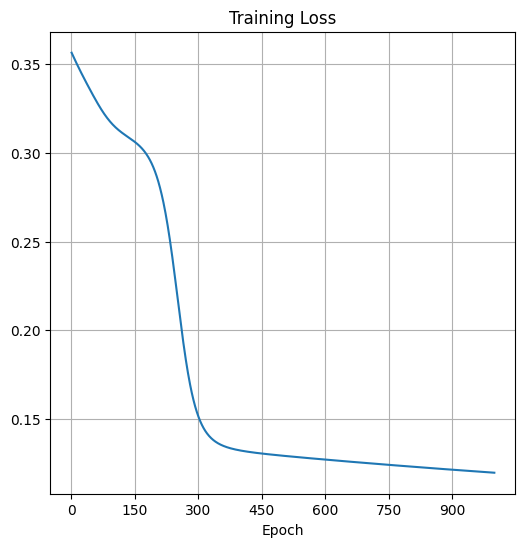

In [67]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn import datasets

X, Y = datasets.load_iris(return_X_y = True)
X, Y = X[:100, :2], Y[:100]
rng = np.random.default_rng(2)
indices = [i for i in range(100)]
rng.shuffle(indices)
X, Y = X[indices], Y[indices]


# assemble your model
model = Network([Layer(2, 4), Layer(4, 1)],
                [sigmoid, sigmoid],
                [d_sigmoid, d_sigmoid],
                l2_loss, d_l2_loss)

# specify training parameters
epochs = 1000
learning_rate = 1e-2
reg_lambda = 0

loss = model.fit(X, Y, epochs, learning_rate, reg_lambda)

# plot the losses, the curve should be decreasing
fig, ax = plt.subplots(figsize = (6, 6))
ax.plot([i + 1 for i in range(epochs)], loss)
ax.set_title("Training Loss")
ax.set_xlabel("Epoch")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(True)
plt.show()


## Q3: Real Data Experiments

In this part, you need to try out different model parameter values and observe how they affect the results.

For each of the questions below, implement experiments and insert performance scores to the designated dictionary. The performance scores can be computed using the imported functions (for F1 score, you need to specify `average = "macro"` when calling the function). You can refer to Q2.4 as an example of implementing experiments.

**Note**: Remember to initialize a new instance of your model for each different choice of hyper-parameter.

### Q3.0: Loading Data

Modify the "data_dir" variable in the following block and run the cell to load the data. Since the provided dataset contains more than two labels, both "YTrain" and "YTest" have been converted to one-hot forms.

**Note**: Be careful about the shapes of the data variables. Specifically, the one-hot encoded labels are **row vectors**.

In [51]:
import pandas
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

data_dir = "dataset" # input the path to "dataset" directory
df_X_train = pandas.read_csv(os.path.join(data_dir, "Digit_X_train.csv"), header = None)
df_X_test = pandas.read_csv(os.path.join(data_dir, "Digit_X_test.csv"), header = None)
df_y_train = pandas.read_csv(os.path.join(data_dir, "Digit_y_train.csv"), header = None)
df_y_test = pandas.read_csv(os.path.join(data_dir, "Digit_y_test.csv"), header = None)
XTrain, XTest = df_X_train.values, df_X_test.values
YTrain, YTest = df_y_train.values, df_y_test.values
print("All labels: " + str(np.unique(YTrain)))

# encode multi-class labels
encoder = OneHotEncoder(sparse_output = False)
YTrain_encoded = encoder.fit_transform(YTrain)
YTest_encoded = encoder.transform(YTest)

print("XTrain.shape = " + str(XTrain.shape))
print("XTest.shape = " + str(XTest.shape))
print("YTrain.shape = " + str(YTrain.shape))
print("YTrain_encoded.shape = " + str(YTrain_encoded.shape))
print("YTest.shape  " + str(YTest.shape))
print("YTest_encoded.shape  " + str(YTest_encoded.shape))

All labels: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
XTrain.shape = (898, 64)
XTest.shape = (899, 64)
YTrain.shape = (898, 1)
YTrain_encoded.shape = (898, 10)
YTest.shape  (899, 1)
YTest_encoded.shape  (899, 10)


### Q3.1: Epochs

Experiment with **five** different choices of total epochs.

In [7]:
def calculate_metrics(y_true, y_pred, scores):
    TP, FP, FN = 0, 0, 0 
    for i, y_hat in enumerate(y_pred):
        if y_hat == 1 and y_true[i] == 1:
            TP += 1
        elif y_hat == 0 and y_true[i] == 1:
            FN += 1
        elif y_hat == 1 and y_true[i] == 0:
            TP += FP
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1 = 2 * precision * recall / (precision + recall)
    scores["F1 (Macro)"].append(F1)
    scores["Accuracy"].append(np.mean(y_pred == y_true))

In [ ]:
scores_train = {"Accuracy" : [], "F1 (Macro)" : []}
scores_test = {"Accuracy" : [], "F1 (Macro)" : []}

############################## start of your code ##############################
epochs = [50, 100, 300, 1000, 3000] # fill the list with your five epoch choices in increasing order

# implement experiments and fill the lists in "scores_train" and
# "scores_test" (one entry per epoch value)
for epoch in epochs:
    model = Network([Layer(64, 32), Layer(32, 10)],
                [sigmoid, sigmoid],
                [d_sigmoid, d_sigmoid],
                l2_loss, d_l2_loss)
    loss = model.fit(XTrain, YTrain_encoded, epoch, 1e-3, 1e-3)
    Y_pred = model.predict(XTrain)[0]
    calculate_metrics(YTrain_encoded, Y_pred, scores_train)

    Y_pred = model.predict(XTest)[0]
    calculate_metrics(YTest_encoded, Y_pred, scores_test)
############################### end of your code ###############################

fig, axes = plt.subplots(1, 2, figsize = (10, 4))
for i, key in enumerate(["Accuracy", "F1 (Macro)"]):
    axes[i].plot(epochs, scores_train[key], "-o", label = "train")
    axes[i].plot(epochs, scores_test[key], "-o", label = "test")
    axes[i].set_title(key)
    axes[i].set_ylim([0, 1])
    axes[i].legend()
    axes[i].grid(True)
plt.show()

### Q3.2: Learning Rate

Experiment with **five** different choices of learning rates.

In [ ]:
scores_train = {"Accuracy" : [], "F1 (Macro)" : []}
scores_test = {"Accuracy" : [], "F1 (Macro)" : []}

############################## start of your code ##############################
LRs = [1e-4, 1e-3, 1e-2, 1e-1, 0.5] # fill the list with your five LR choices in increasing order

# implement experiments and fill the lists in "scores_train" and
# "scores_test" (one entry per LR value)
x_train, y_train = [], []
x_pred, y_pred = [], []

def run_experiment():
    for lr in LRs:
        model = Network([Layer(64, 32), Layer(32, 10)],
                    [sigmoid, sigmoid],
                    [d_sigmoid, d_sigmoid],
                    l2_loss, d_l2_loss)
        loss = model.fit(XTrain, YTrain_encoded, 300, lr, 1e-3)
        Y_pred = model.predict(XTrain)[0]
        calculate_metrics(YTrain_encoded, Y_pred, scores_train)

        Y_pred = model.predict(XTest)[0]
        calculate_metrics(YTest_encoded, Y_pred, scores_test)
        
run_experiment()
############################### end of your code ###############################

fig, axes = plt.subplots(1, 2, figsize = (10, 4))
for i, key in enumerate(["Accuracy", "F1 (Macro)"]):
    axes[i].plot(LRs, scores_train[key], "-o", label = "train")
    axes[i].plot(LRs, scores_test[key], "-o", label = "test")
    axes[i].set_title(key)
    axes[i].set_ylim([0, 1])
    axes[i].legend()
    axes[i].grid(True)
plt.show()

### Q3.3: Regularization Parameter

Experiment with **five** different choices of regularization parameter.

In [ ]:
scores_train = {"Accuracy" : [], "F1 (Macro)" : []}
scores_test = {"Accuracy" : [], "F1 (Macro)" : []}

############################## start of your code ##############################
lambdas = [0, 0.01, 0.1, 0.5, 1] # fill the list with your five regularization lambda choices in increasing order

# implement experiments and fill the lists in "scores_train" and
# "scores_test" (one entry per reg_lambda value)
def run_experiment():
    for lam in lambdas:
        model = Network([Layer(64, 32), Layer(32, 10)],
                    [sigmoid, sigmoid],
                    [d_sigmoid, d_sigmoid],
                    l2_loss, d_l2_loss)
        loss = model.fit(XTrain, YTrain_encoded, 300, 1e-3, lam)
        Y_pred = model.predict(XTrain)[0]
        calculate_metrics(YTrain_encoded, Y_pred, scores_train)

        Y_pred = model.predict(XTest)[0]
        calculate_metrics(YTest_encoded, Y_pred, scores_test)
        
run_experiment()
############################### end of your code ###############################

fig, axes = plt.subplots(1, 2, figsize = (10, 4))
for i, key in enumerate(["Accuracy", "F1 (Macro)"]):
    axes[i].plot(lambdas, scores_train[key], "-o", label = "train")
    axes[i].plot(lambdas, scores_test[key], "-o", label = "test")
    axes[i].set_title(key)
    axes[i].set_ylim([0, 1])
    axes[i].legend()
    axes[i].grid(True)
plt.show()

### Q3.4: Network Structure

Experiment with **five** different choices of network structure. This includes number of layers and number of nodes in each layer.

*Hint*: Try experimenting with increasing complexity. You may need to hard-code the experiments without using a for loop.


In [ ]:
levels = [1, 2, 3, 4, 5]
scores_train = {"Accuracy" : [], "F1 (Macro)" : []}
scores_test = {"Accuracy" : [], "F1 (Macro)" : []}
architectures = [
    [Layer(64, 32), Layer(32, 10)],
    [Layer(64, 32), Layer(32, 16), Layer(16, 10)],
    [Layer(64, 64), Layer(64, 32), Layer(32, 16), Layer(16, 10)],
    [Layer(64, 128), Layer(128, 64), Layer(64, 32), Layer(32, 16), Layer(16, 10)],
    [Layer(64, 256), Layer(256, 128), Layer(128, 64), Layer(64, 32), Layer(32, 16), Layer(16, 10)]
]
############################## start of your code ##############################
# implement experiments and fill the lists in "scores_train" and
# "scores_test" (one entry per complexity level)
def run_experiment():
    for i in range(len(architectures)):
        model = Network(architectures[i],
                    [sigmoid, sigmoid],
                    [d_sigmoid, d_sigmoid],
                    l2_loss, d_l2_loss)
        loss = model.fit(XTrain, YTrain_encoded, 300, 1e-3, 1e-3)
        Y_pred = model.predict(XTrain)[0]
        calculate_metrics(YTrain_encoded, Y_pred, scores_train)

        Y_pred = model.predict(XTest)[0]
        calculate_metrics(YTest_encoded, Y_pred, scores_test)
        
run_experiment()
############################### end of your code ###############################

fig, axes = plt.subplots(1, 2, figsize = (10, 4))
for i, key in enumerate(["Accuracy", "F1 (Macro)"]):
    axes[i].plot(levels, scores_train[key], "-o", label = "train")
    axes[i].plot(levels, scores_test[key], "-o", label = "test")
    axes[i].set_title(key)
    axes[i].set_ylim([0, 1])
    axes[i].legend()
    axes[i].grid(True)
plt.show()

## Q4: Follow-up Questions

For each question below, provide a short answer. You can cite your code if needed.

### Q4.1: Briefly describe the workflow of how your model classifies the data.

The model classifies data by first training a neural network using supervised learning on the provided dataset. During training, it performs forward propagation to compute the outputs for each input sample and then calculates the loss using the cross-entropy loss function. It then conducts backward propagation to update the network's weights and biases based on the gradients of the loss with respect to these parameters. After training, the model predicts the class labels of new, unseen data by feeding the inputs through the network (forward propagation) and using the softmax activation function in the output layer to obtain probabilities for each class. The class with the highest probability is selected as the predicted label for each input sample.

### Q4.2: In your own words, explain how the forward propagation in your model works.

During forward propagation, the model processes input data by passing it through each layer of the neural network sequentially. For each layer, it computes the weighted sum of the inputs and the layer's weights, adds a bias term if applicable, and then applies an activation function to introduce non-linearity. Specifically, the hidden layers use the sigmoid activation function to capture complex patterns in the data. In the output layer, the model applies the softmax activation function to convert the final linear outputs into probabilities that sum to one across all classes. This process transforms the original input features into a final output that represents the model's confidence in each possible class label.

### Q4.3: In your own words, explain how the backward propagation in your model works.

Backward propagation in the model involves computing gradients of the loss function with respect to the network's weights and biases to update them in a way that minimizes the loss. It begins by calculating the error at the output layer, which, due to the use of softmax activation and cross-entropy loss, simplifies to the difference between the predicted probabilities and the one-hot encoded true labels. This error (delta) is then propagated backward through the network by applying the chain rule, multiplying it by the derivative of the activation function of each preceding layer to determine how changes in weights affect the loss. At each layer, the model computes the gradients of the weights by taking the dot product of the transposed activations from the previous layer and the delta, and updates the biases directly using the delta. These gradients are accumulated over all samples, and the model updates the weights and biases by subtracting a fraction of the gradients (scaled by the learning rate and adjusted for regularization) to reduce the overall loss in subsequent iterations.

### Q4.4: In theory, how do the total number of epochs, the learning rate, and the regularization parameter impact the performance of model? Does any of the theoretical impact actually happen in your result? If so, point them out.

**[Answer]**

**Epochs** 
The total number of epochs determines how many times the model iterates over the entire training dataset; more epochs allow the model to learn more from the data but can lead to overfitting if the model fits the training data too closely, and the predictions do not generalize well to unseen data.

**Learning Rate**
The learning rate controls the size of the weight updates during training; a higher learning rate can speed up convergence but may cause the model to overshoot minima in the loss function, while a lower learning rate ensures more precise updates but can make training slow and potentially get stuck in local minima.

**Regularization Parameter**
The regularization parameter adds a penalty for larger weights in the loss function to prevent overfitting; increasing this parameter encourages the model to keep weights small, promoting simplicity and improving generalization to new data, but setting it too high can lead to underfitting by overly restricting the model's capacity to learn from the data.